In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
import prophet

In [3]:
data=pd.read_csv("GOOG.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,1188.010010,1065700
1,2019-08-12,1179.209961,1184.959961,1167.671997,1174.709961,1174.709961,1003000
2,2019-08-13,1171.459961,1204.780029,1171.459961,1197.270020,1197.270020,1294400
3,2019-08-14,1176.310059,1182.300049,1160.540039,1164.290039,1164.290039,1578700
4,2019-08-15,1163.500000,1175.839966,1162.109985,1167.260010,1167.260010,1218700


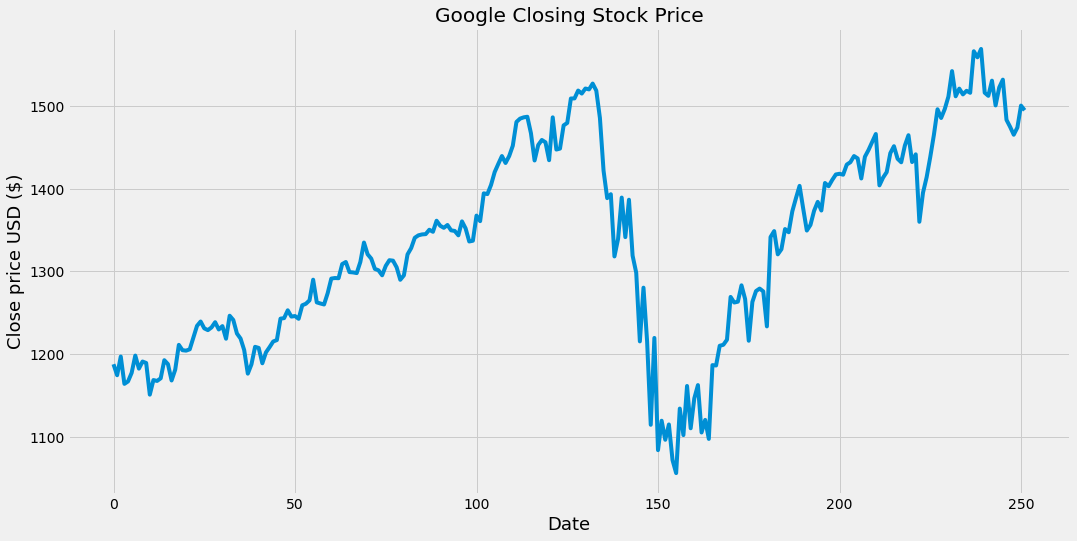

In [4]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [5]:
data=data[['Date',"Close"]]
data=data.rename(columns={"Date":'ds',"Close":'y'})
data.head()

,ds,y
0,2019-08-09,1188.010010
1,2019-08-12,1174.709961
2,2019-08-13,1197.270020
3,2019-08-14,1164.290039
4,2019-08-15,1167.260010


In [6]:
m=prophet.Prophet(daily_seasonality=True)
m.fit(data)


00:28:34 - cmdstanpy - INFO - Chain [1] start processing
00:28:34 - cmdstanpy - INFO - Chain [1] done processing


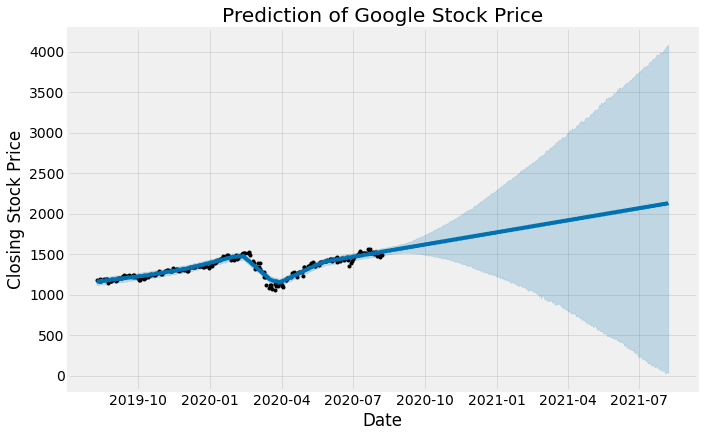

In [7]:
future=m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of Google Stock Price")
plt.xlabel('Date')
plt.ylabel("Closing Stock Price")
plt.show()

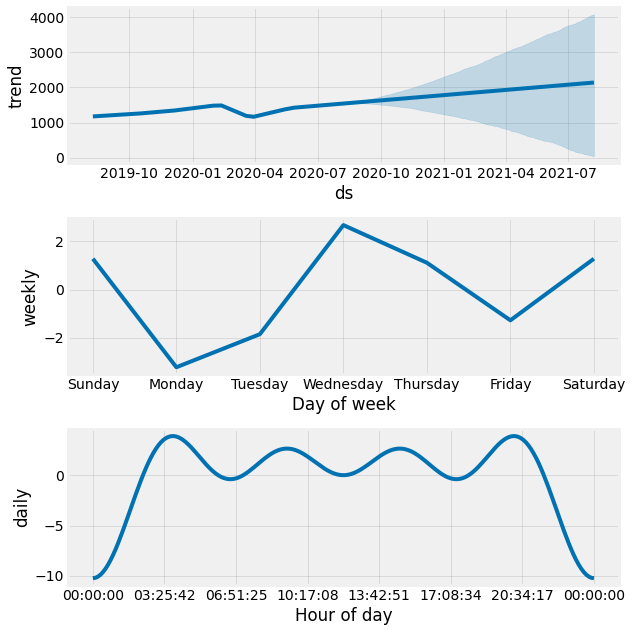

In [8]:
m.plot_components(predictions)
plt.show()